In [7]:
#takes 
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
import hepran
import hepran.bzipscore as bz
from hepran.bzipscore import *
import hepran.utils as u
import hepran.registers as r
import numpy as np
CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")
from glob import glob
import pandas as pd
from StringIO import StringIO
import collections
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\data\ortoCC\fine_tune_scoring_function\OUT_SETS


skeleton
```
P1: D EIAALEA ENAALEA ENAALEA EIAALEA
P2: D KIAALKA KNAALKA KNAALKA KIAALKA


P5: D ENAALEA KIAALKA KNAALKA EIAALEA
P6: D KNAALKA EIAALEA ENAALEA KIAALKA

P7: D EIAALEA KNAALKA KIAALKA ENAALEA
P8: D KIAALKA ENAALEA EIAALEA KNAALKA
```    

In [8]:
skeletons = u.load_fasta("!05_cross_pairs/PNIC.aA.fasta") 
fasta_out = collections.OrderedDict()
pairs_out = []

In [9]:
cores = list(itertools.product("NI", repeat=4))
print(len(cores))
es = list(itertools.product("EK", repeat=4))
print(len(es))

16
16


In [10]:
def invert_es_sequence(es):
    res = []
    for r in es:
        #print(r)
        if r=="E":
            res+="K"
        elif r=="K":
            res+="E"            
    return res        

invert_es_sequence(list("EEEE")) == list("KKKK")     
assert invert_es_sequence(list("EKEK")) == list("KEKE")

In [11]:
def get_all_cores(id1, id2, cores):
    sk1 = skeletons[id1]
    sk2 = skeletons[id2]
    rid1 = r.get_register_indices(sk1, 'f')
    rid2 = r.get_register_indices(sk2, 'f')
    for core in cores:
        #print(core)
        rid1.set_reg('a', "all", core)
        rid2.set_reg('a', "all", core)
        id1_out ="{id1}-core_{core}".format(id1=id1, core="".join(core))
        id2_out ="{id2}-core_{core}".format(id2=id2, core="".join(core))
        fasta_out[id1_out] = rid1.get_seq_str()
        fasta_out[id2_out] = rid2.get_seq_str()
        pairs_out.append((id1_out,id2_out))   
        
def get_all_es(id1, id2, electrostatics):
    sk1 = skeletons[id1]
    sk2 = skeletons[id2]
    rid1 = r.get_register_indices(sk1, 'f')
    rid2 = r.get_register_indices(sk2, 'f')
    for es in electrostatics:
        #print(core)
        rid1.set_reg('g', "all", es)
        rid1.set_reg('e', "all", es)
        ies = invert_es_sequence(es)       
        rid2.set_reg('g', "all", ies)
        rid2.set_reg('e', "all", ies)

        id1_out ="{id1}-es_{es}".format(id1=id1, es="".join(es))
        id2_out ="{id2}-es_{es}".format(id2=id2, es="".join(ies))
        fasta_out[id1_out] = rid1.get_seq_str()
        fasta_out[id2_out] = rid2.get_seq_str()
        pairs_out.append((id1_out,id2_out))        
        
def get_all_on_target(id1, id2, core, electrostatics):
    sk1 = skeletons[id1]
    sk2 = skeletons[id2]
    rid1 = r.get_register_indices(sk1, 'f')
    rid2 = r.get_register_indices(sk2, 'f')
    for core in cores:
        for es in electrostatics:
            #print(core)
            rid1.set_reg('a', "all", core)
            rid2.set_reg('a', "all", core)
            
            rid1.set_reg('g', "all", es)
            rid1.set_reg('e', "all", es)
            ies = invert_es_sequence(es)       
            rid2.set_reg('g', "all", ies)
            rid2.set_reg('e', "all", ies)

            id1_out ="core_{core}-es_{es}".format(es="".join(es), core="".join(core))
            id2_out ="core_{core}-es_{ies}".format(ies="".join(ies), core="".join(core))
            fasta_out[id1_out] = rid1.get_seq_str()
            fasta_out[id2_out] = rid2.get_seq_str()
            pairs_out.append((id1_out,id2_out))             

In [13]:
#get_all_cores("P5-aA", "P6-aA", cores)    
#get_all_cores("P1-aA", "P2-aA", cores)  
#get_all_es("P1-aA", "P2-aA", es)
#get_all_es("P1-aA", "P2-aA", es)
get_all_on_target("P1-aA", "P2-aA", cores, es)


In [14]:

print(len(pairs_out))
pairs_out

256


[('core_NNNN-es_EEEE', 'core_NNNN-es_KKKK'),
 ('core_NNNN-es_EEEK', 'core_NNNN-es_KKKE'),
 ('core_NNNN-es_EEKE', 'core_NNNN-es_KKEK'),
 ('core_NNNN-es_EEKK', 'core_NNNN-es_KKEE'),
 ('core_NNNN-es_EKEE', 'core_NNNN-es_KEKK'),
 ('core_NNNN-es_EKEK', 'core_NNNN-es_KEKE'),
 ('core_NNNN-es_EKKE', 'core_NNNN-es_KEEK'),
 ('core_NNNN-es_EKKK', 'core_NNNN-es_KEEE'),
 ('core_NNNN-es_KEEE', 'core_NNNN-es_EKKK'),
 ('core_NNNN-es_KEEK', 'core_NNNN-es_EKKE'),
 ('core_NNNN-es_KEKE', 'core_NNNN-es_EKEK'),
 ('core_NNNN-es_KEKK', 'core_NNNN-es_EKEE'),
 ('core_NNNN-es_KKEE', 'core_NNNN-es_EEKK'),
 ('core_NNNN-es_KKEK', 'core_NNNN-es_EEKE'),
 ('core_NNNN-es_KKKE', 'core_NNNN-es_EEEK'),
 ('core_NNNN-es_KKKK', 'core_NNNN-es_EEEE'),
 ('core_NNNI-es_EEEE', 'core_NNNI-es_KKKK'),
 ('core_NNNI-es_EEEK', 'core_NNNI-es_KKKE'),
 ('core_NNNI-es_EEKE', 'core_NNNI-es_KKEK'),
 ('core_NNNI-es_EEKK', 'core_NNNI-es_KKEE'),
 ('core_NNNI-es_EKEE', 'core_NNNI-es_KEKK'),
 ('core_NNNI-es_EKEK', 'core_NNNI-es_KEKE'),
 ('core_NN

In [17]:
po = [po[0] for po in pairs_out] 
print("\n".join(po))

core_NNNN-es_EEEE
core_NNNN-es_EEEK
core_NNNN-es_EEKE
core_NNNN-es_EEKK
core_NNNN-es_EKEE
core_NNNN-es_EKEK
core_NNNN-es_EKKE
core_NNNN-es_EKKK
core_NNNN-es_KEEE
core_NNNN-es_KEEK
core_NNNN-es_KEKE
core_NNNN-es_KEKK
core_NNNN-es_KKEE
core_NNNN-es_KKEK
core_NNNN-es_KKKE
core_NNNN-es_KKKK
core_NNNI-es_EEEE
core_NNNI-es_EEEK
core_NNNI-es_EEKE
core_NNNI-es_EEKK
core_NNNI-es_EKEE
core_NNNI-es_EKEK
core_NNNI-es_EKKE
core_NNNI-es_EKKK
core_NNNI-es_KEEE
core_NNNI-es_KEEK
core_NNNI-es_KEKE
core_NNNI-es_KEKK
core_NNNI-es_KKEE
core_NNNI-es_KKEK
core_NNNI-es_KKKE
core_NNNI-es_KKKK
core_NNIN-es_EEEE
core_NNIN-es_EEEK
core_NNIN-es_EEKE
core_NNIN-es_EEKK
core_NNIN-es_EKEE
core_NNIN-es_EKEK
core_NNIN-es_EKKE
core_NNIN-es_EKKK
core_NNIN-es_KEEE
core_NNIN-es_KEEK
core_NNIN-es_KEKE
core_NNIN-es_KEKK
core_NNIN-es_KKEE
core_NNIN-es_KKEK
core_NNIN-es_KKKE
core_NNIN-es_KKKK
core_NNII-es_EEEE
core_NNII-es_EEEK
core_NNII-es_EEKE
core_NNII-es_EEKK
core_NNII-es_EKEE
core_NNII-es_EKEK
core_NNII-es_EKKE
core_NNII-

In [95]:
print(len(fasta_out))
fasta_out

256


OrderedDict([('core_NNNN-es_EEEE', 'DENAALEAENAALEAENAALEAENAALEG'),
             ('core_NNNN-es_KKKK', 'DKNAALKAKNAALKAKNAALKAKNAALKG'),
             ('core_NNNN-es_EEEK', 'DENAALEAENAALEAENAALEAKNAALKG'),
             ('core_NNNN-es_KKKE', 'DKNAALKAKNAALKAKNAALKAENAALEG'),
             ('core_NNNN-es_EEKE', 'DENAALEAENAALEAKNAALKAENAALEG'),
             ('core_NNNN-es_KKEK', 'DKNAALKAKNAALKAENAALEAKNAALKG'),
             ('core_NNNN-es_EEKK', 'DENAALEAENAALEAKNAALKAKNAALKG'),
             ('core_NNNN-es_KKEE', 'DKNAALKAKNAALKAENAALEAENAALEG'),
             ('core_NNNN-es_EKEE', 'DENAALEAKNAALKAENAALEAENAALEG'),
             ('core_NNNN-es_KEKK', 'DKNAALKAENAALEAKNAALKAKNAALKG'),
             ('core_NNNN-es_EKEK', 'DENAALEAKNAALKAENAALEAKNAALKG'),
             ('core_NNNN-es_KEKE', 'DKNAALKAENAALEAKNAALKAENAALEG'),
             ('core_NNNN-es_EKKE', 'DENAALEAKNAALKAKNAALKAENAALEG'),
             ('core_NNNN-es_KEEK', 'DKNAALKAENAALEAENAALEAKNAALKG'),
             ('core_NNNN-es_EKKK',

In [96]:
u.save_dict_to_fasta(fasta_out, '!05_cross_pairs/NIEK_crosspairs.fasta')

In [97]:
u.save_set(pairs_out, '!05_cross_pairs/NIEK_crosspairs.pairs')

In [79]:
!cd '!05_cross_pairs'; bzipscore.pl NIEK_crosspairs.pairs NIEK_crosspairs.fasta > NIEK_crosspairs.out


The system cannot find the path specified.


In [80]:
scores = bz.load_score_file('!05_cross_pairs/NIEK_crosspairs.out')

In [81]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('talk',  font_scale=1.5)
#sns.set_style('white')

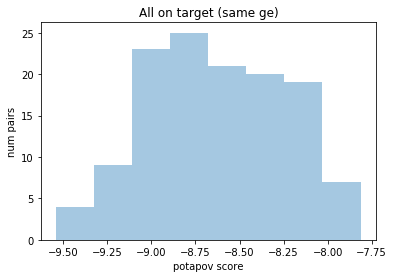

In [86]:
sns.distplot(scores.values(),kde=False, norm_hist=False)
plt.xlabel('potapov score')
plt.ylabel('num pairs');
plt.title("All on target (same ge)");